## Importing the necessary libraries

In [51]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing import image

## Getting the path of the training and testing data of the brain tumor dataset

In [52]:
dataset_directory_location = r'C:\Users\abhij\Desktop\Image Classification\braintumordataset'

In [53]:
os.listdir(dataset_directory_location)

['Testing', 'Training', 'Validation']

In [54]:
train_dataset_location = os.path.join(dataset_directory_location, 'Training')
valid_dataset_location = os.path.join(dataset_directory_location, 'Validation')
test_dataset_location = os.path.join(dataset_directory_location, 'Testing')

In [55]:
os.listdir(train_dataset_location)

['glioma', 'meningioma', 'notumor', 'pituitary']

In [56]:
os.listdir(test_dataset_location)

['glioma', 'meningioma', 'notumor', 'pituitary']

In [57]:
os.listdir(valid_dataset_location)

['glioma', 'meningioma', 'notumor', 'pituitary']

In [58]:
def visualize_images(directory, num_images=5):
    image_files = os.listdir(directory)[:num_images]
    plt.figure(figsize=(10, 10))
    for i, image_file in enumerate(image_files, 1):
        img_path = os.path.join(directory, image_file)
        img = mpimg.imread(img_path)
        img_size = img.shape[:2]
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.title(f"Size: {img_size}")
        plt.axis('off')
    plt.show()

Glioma:


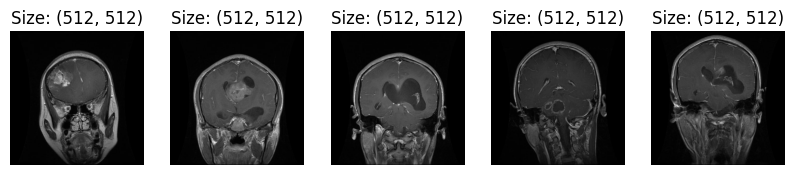

Meningioma:


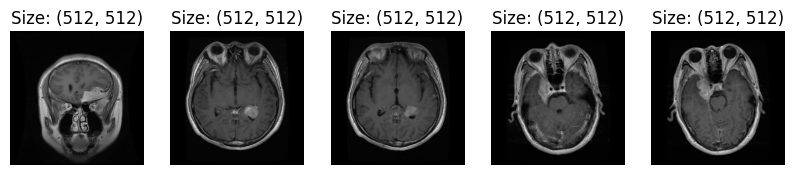

No Tumor:


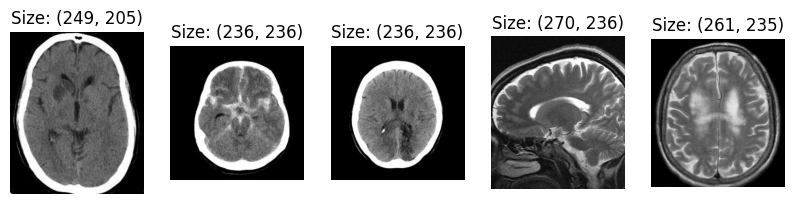

Pituitary:


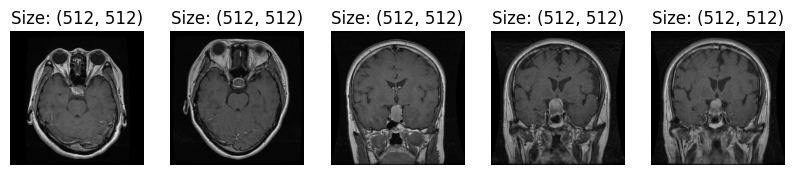

In [59]:
train_glioma_directory = os.path.join(train_dataset_location, 'glioma')
train_meningioma_directory = os.path.join(train_dataset_location, 'meningioma')
train_notumor_directory = os.path.join(train_dataset_location, 'notumor')
train_pituitary_directory = os.path.join(train_dataset_location, 'pituitary')


print("Glioma:")
visualize_images(train_glioma_directory)

print("Meningioma:")
visualize_images(train_meningioma_directory)

print("No Tumor:")
visualize_images(train_notumor_directory)

print("Pituitary:")
visualize_images(train_pituitary_directory)

## Defining the correct shape of the image

In [60]:
correct_image_shape = (224, 224, 3)

## Defining the ImageGenerator and performing Data Augmentation

In [61]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    shear_range=0.2,
    rescale=1./255
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [62]:
train_generator = train_datagen.flow_from_directory(
    train_dataset_location,
    target_size=correct_image_shape[:2],
    batch_size=32,
    color_mode='rgb', 
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    valid_dataset_location,
    target_size=correct_image_shape[:2],
    batch_size=32,
    color_mode='rgb', 
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dataset_location,
    target_size=correct_image_shape[:2],
    color_mode='rgb', 
    batch_size=32,
    class_mode='categorical'
)

Found 5617 images belonging to 4 classes.
Found 703 images belonging to 4 classes.
Found 703 images belonging to 4 classes.


## Creating and training the model

In [63]:
model = Sequential()

In [64]:
vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=correct_image_shape)

In [65]:
vgg19_model.trainable = False

In [66]:
model.add(vgg19_model)

model.add(Flatten())

model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Dense(4, activation='softmax'))

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization_6 (Batc  (None, 25088)            100352    
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [68]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])

In [69]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
history = model.fit(train_generator, validation_data=val_generator, epochs=30,callbacks=[early_stopping])

Epoch 1/30
176/176 [==============================] - 87s 487ms/step - loss: 1.4202 - accuracy: 0.4584 - val_loss: 1.0239 - val_accuracy: 0.5078
Epoch 2/30
176/176 [==============================] - 87s 496ms/step - loss: 1.0308 - accuracy: 0.5966 - val_loss: 0.7483 - val_accuracy: 0.7226
Epoch 3/30
176/176 [==============================] - 96s 545ms/step - loss: 0.8948 - accuracy: 0.6434 - val_loss: 0.6991 - val_accuracy: 0.7440
Epoch 4/30
176/176 [==============================] - 94s 535ms/step - loss: 0.8217 - accuracy: 0.6737 - val_loss: 0.6892 - val_accuracy: 0.7539
Epoch 5/30
176/176 [==============================] - 91s 515ms/step - loss: 0.7560 - accuracy: 0.7020 - val_loss: 0.6802 - val_accuracy: 0.7539
Epoch 6/30
176/176 [==============================] - 92s 519ms/step - loss: 0.7293 - accuracy: 0.7143 - val_loss: 0.6614 - val_accuracy: 0.7511
Epoch 7/30
176/176 [==============================] - 96s 546ms/step - loss: 0.7074 - accuracy: 0.7258 - val_loss: 0.6306 - val_ac

In [70]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

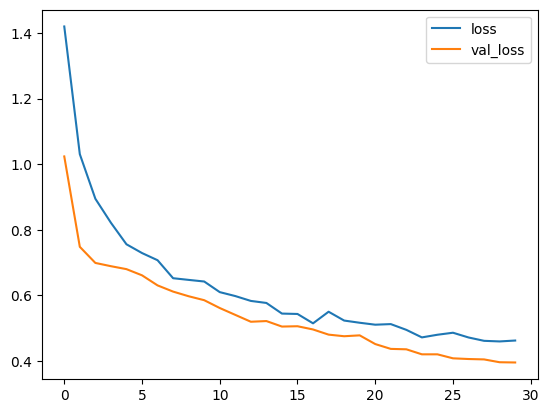

In [71]:
history_df[['loss', 'val_loss']].plot()

<Axes: >

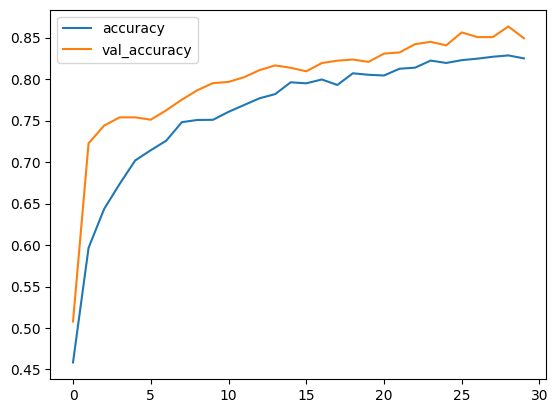

In [72]:
history_df[['accuracy', 'val_accuracy']].plot()

## Evaluating the model

In [73]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

22/22 [==============================] - 7s 282ms/step - loss: 0.3940 - accuracy: 0.8478
Test Loss: 0.3940064609050751
Test Accuracy: 0.8477951884269714


## Predicting on a sample image

In [74]:
img_path = r'C:\Users\abhij\Desktop\Image Classification\braintumordataset\Testing\glioma\Te-gl_0191.JPG'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [75]:
predictions = model.predict(img_array)
class_names = ['glioma', 'meningioma','notumor','pituitary']
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
print(predicted_class)

1/1 [==============================] - 2s 2s/step
glioma


In [76]:
model.save('vgg19_model.h5')